<a href="https://colab.research.google.com/github/Timmmy88880/machine-learning/blob/cola/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train shape: (105, 4)
test shape: (45, 4)
訓練集:  0.9619047619047619
測試集:  0.9555555555555556


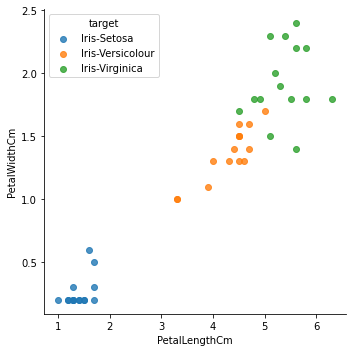

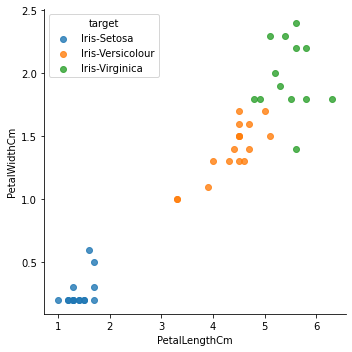

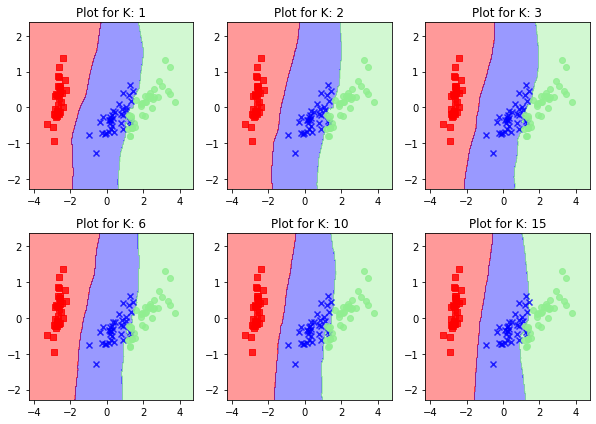

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)

# 預測成功的比例
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test['Species'] = y_test
pred = knnModel.predict(X_test)
df_test['Predict'] = pred
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')
def knn_model(plot_dict, X, y, k):
    #create model
    model = KNeighborsClassifier(n_neighbors=k)

    #training
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    if k in plot_dict:
        plt.subplot(plot_dict[k])
        plt.tight_layout()
        plot_decision_regions(X,y,model)
        plt.title('Plot for K: %d'%k )
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.fit_transform(X_test)
#KNN 訓練集 PCA 2 features
plt.figure(figsize=(8.5, 6))

# 調整 K
plot_dict = {1:231,2:232,3:233,6:234,10:235,15:236}
for i in plot_dict:
    knn_model(plot_dict, train_reduced, y_train, i)